<a href="https://colab.research.google.com/github/damianmtz98/PyCdeD/blob/main/T6_Analisis_Audios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# función para cargar y preprocesar los audios
def load_and_preprocess_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    y = librosa.effects.trim(y)[0]  # con esto recortamos el silencio
    return y, sr

In [42]:
# cargamos los audios
audio_paths = ['mex-ale.app.wav', 'mex-chi.app.wav', 'mex-cr.app.wav', 'mex-hol.app.wav']
audios = [load_and_preprocess_audio(path) for path in audio_paths]

In [43]:
# verificamos la carga de los audios
for i, (y, sr) in enumerate(audios):
    print(f'Audio {i+1}: Duración {len(y)/sr:.2f} segundos, Tasa de Muestreo {sr} Hz')

Audio 1: Duración 28.33 segundos, Tasa de Muestreo 44100 Hz
Audio 2: Duración 31.00 segundos, Tasa de Muestreo 44100 Hz
Audio 3: Duración 65.24 segundos, Tasa de Muestreo 44100 Hz
Audio 4: Duración 112.79 segundos, Tasa de Muestreo 44100 Hz


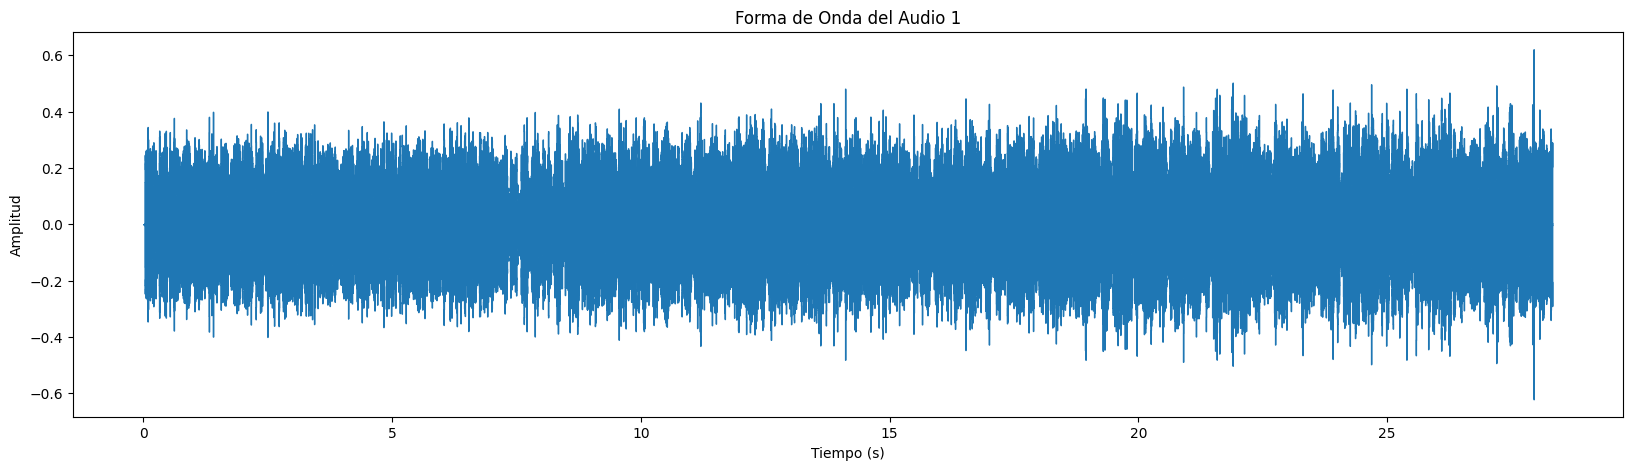

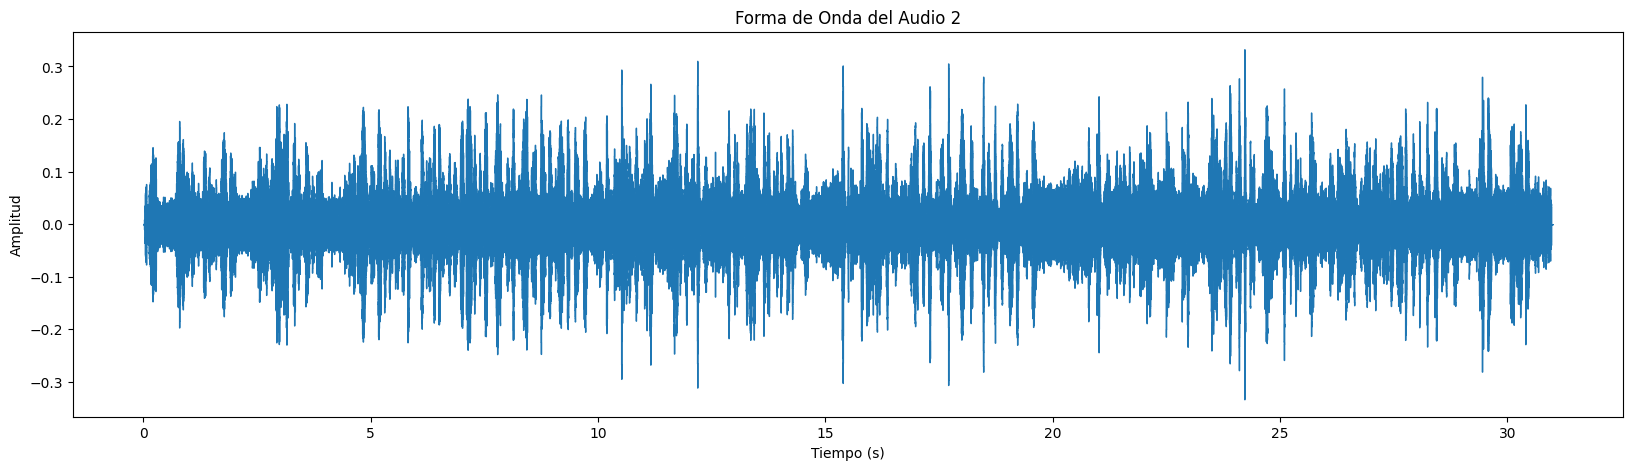

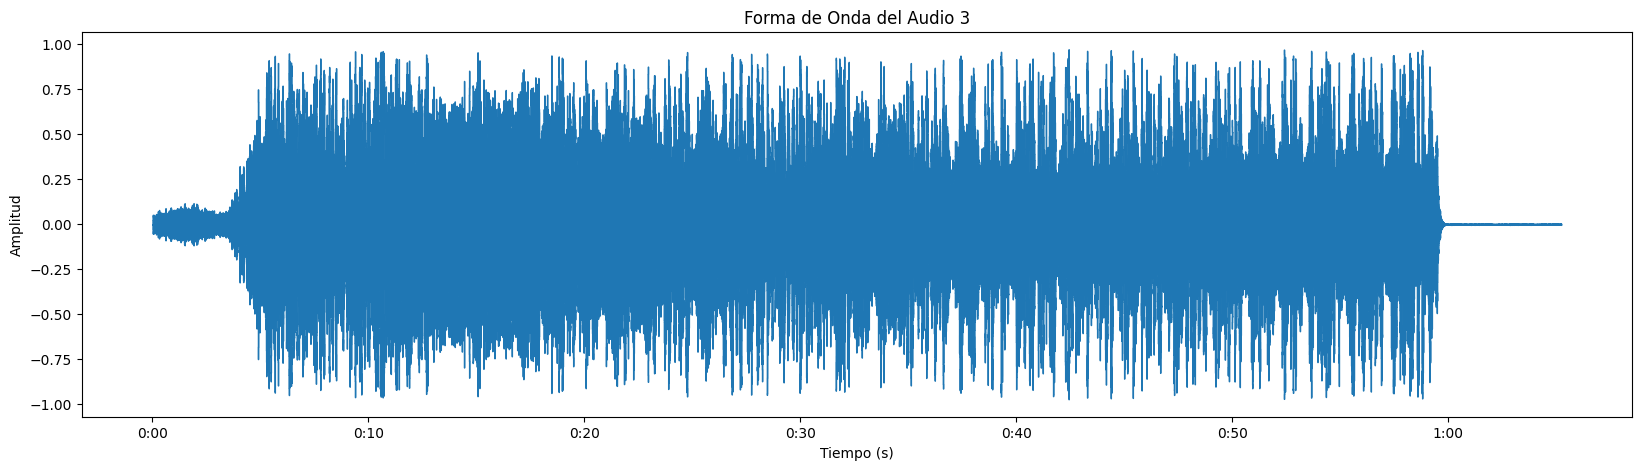

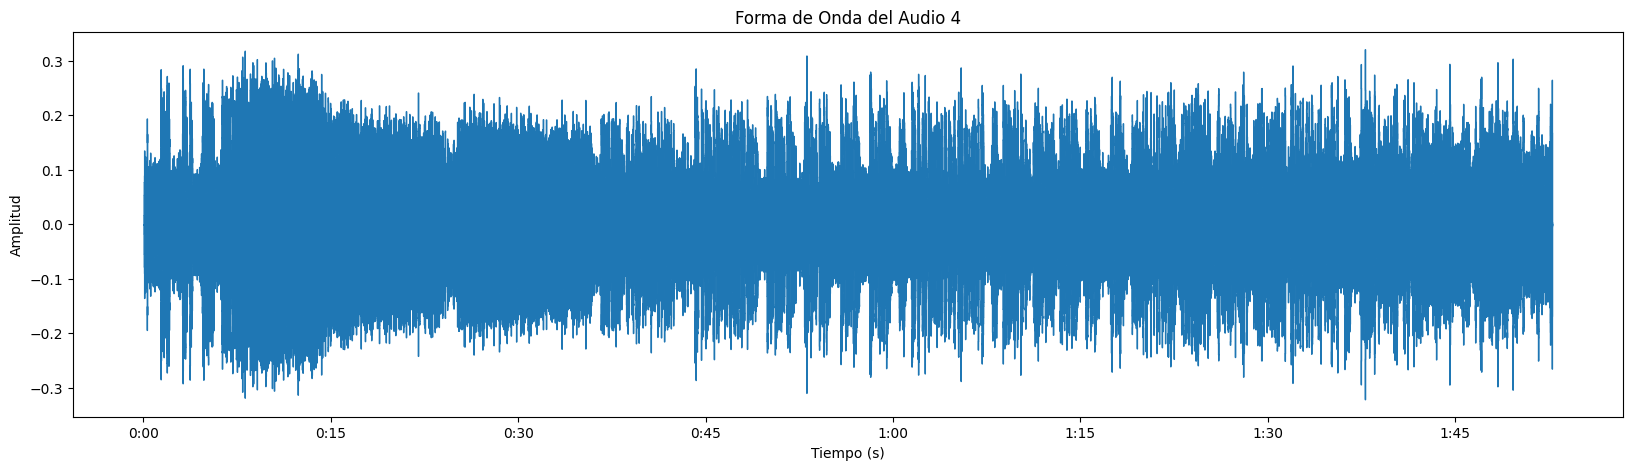

In [44]:
# función para graficar la forma de onda
def plot_waveform(y, sr, title):
    plt.figure(figsize=(20, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.show()

# generamos y visualizamos las formas de onda
for i, (y, sr) in enumerate(audios):
    plot_waveform(y, sr, f'Forma de Onda del Audio {i+1}')


In [45]:
# función para extraer MFCCs
def extract_mfcc(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extrae los MFCCs de la señal de audio
    return mfccs

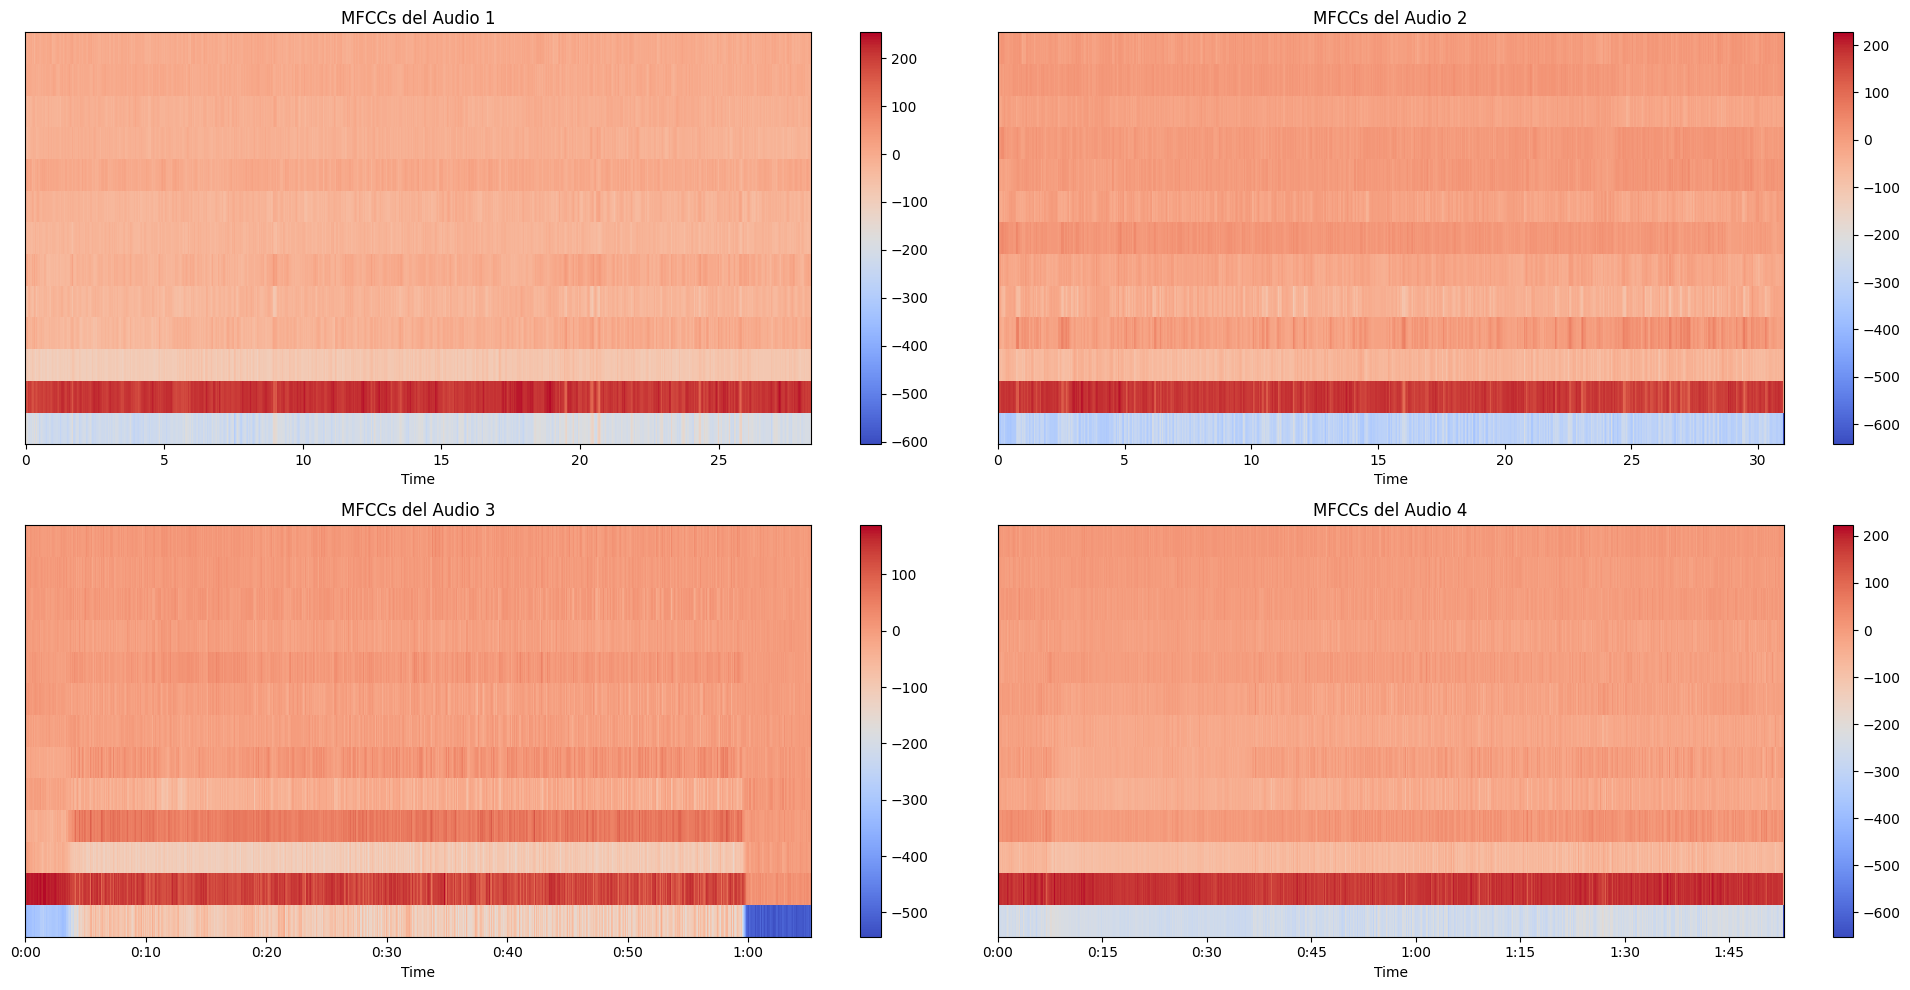

In [46]:
# extraemos y visualizamos los MFCCs
mfccs_list = [extract_mfcc(y, sr) for y, sr in audios]

plt.figure(figsize=(20, 10))
for i, mfccs in enumerate(mfccs_list):
    plt.subplot(2, 2, i+1)
    librosa.display.specshow(mfccs, sr=audios[i][1], x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs del Audio {i+1}')
plt.tight_layout()
plt.show()


In [47]:
# función para generar los espectrogramas
def plot_spectrogram(y, sr, title):
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    plt.figure(figsize=(8, 5))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

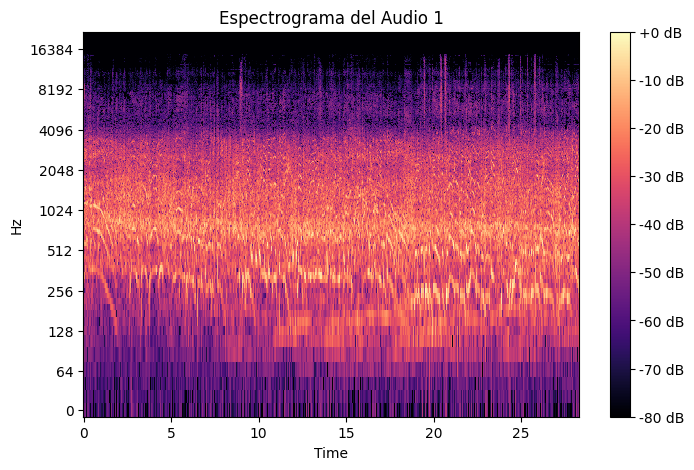

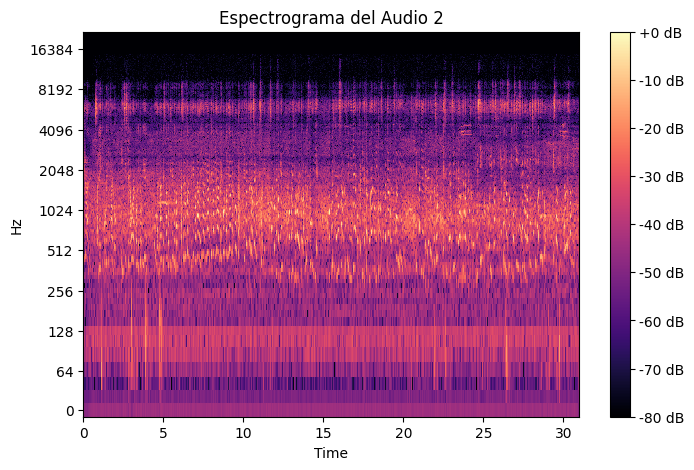

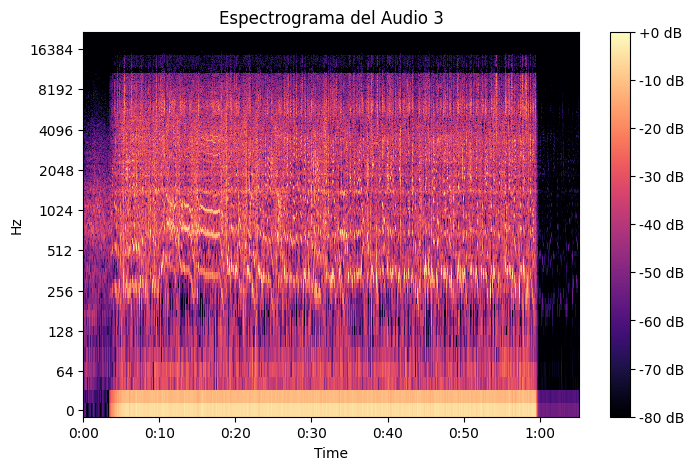

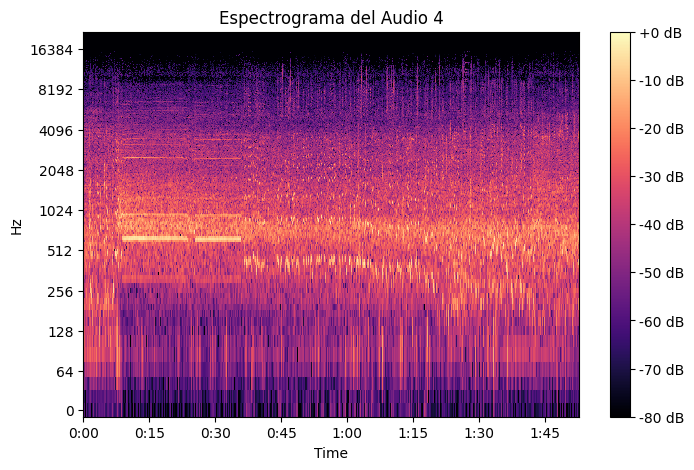

In [48]:
# generamos y visualizamos los espectrogramas
for i, (y, sr) in enumerate(audios):
    plot_spectrogram(y, sr, f'Espectrograma del Audio {i+1}')

In [ ]:
# definimos la función para extraer frecuencias representativas y convertir a dB
def extract_representative_frequencies_db(y, sr):
    S = np.abs(librosa.stft(y))
    freqs = librosa.fft_frequencies(sr=sr)
    magnitudes = np.mean(S, axis=1)
    magnitudes_db = librosa.amplitude_to_db(magnitudes, ref=np.max)
    return freqs, magnitudes_db

In [ ]:
# extraemos frecuencias representativas para cada audio
representative_frequencies_db = [extract_representative_frequencies_db(y, sr) for y, sr in audios]

In [ ]:
# filtramos frecuencias superiores a 2000 Hz para una visualización más clara
filtered_frequencies_db = [(freqs[freqs <= 2000], mags[freqs <= 2000]) for freqs, mags in representative_frequencies_db]

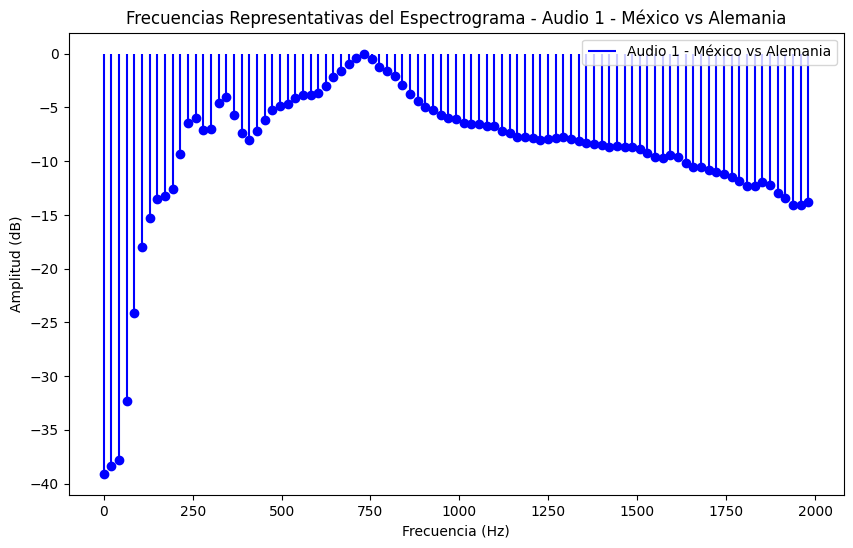

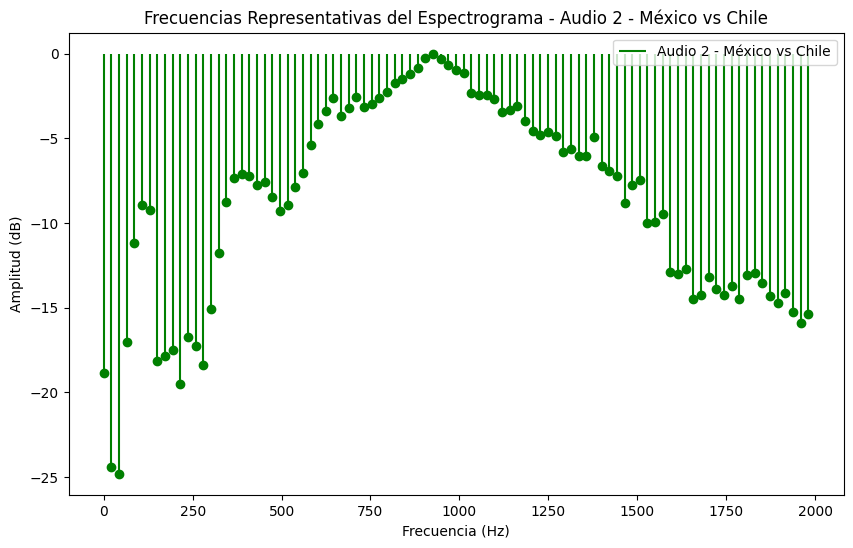

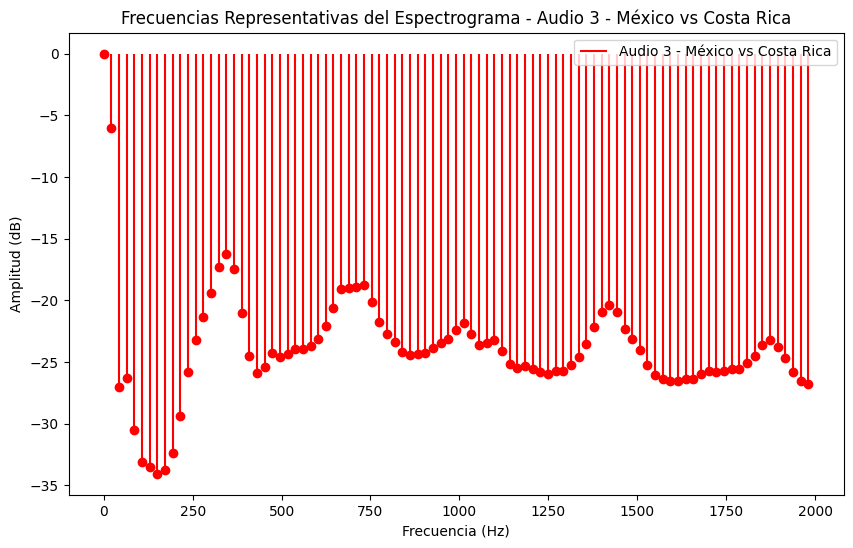

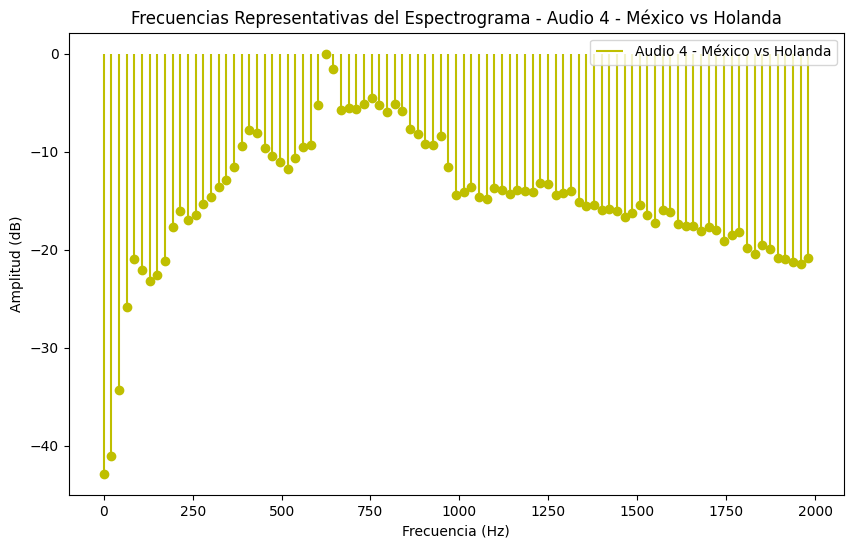

In [56]:
# visualizamos las frecuencias representativas en dB para cada audio
labels = ['Audio 1 - México vs Alemania', 'Audio 2 - México vs Chile', 'Audio 3 - México vs Costa Rica', 'Audio 4 - México vs Holanda']
colors = ['b', 'g', 'r', 'y']

for i, (freqs, mags) in enumerate(filtered_frequencies_db):
    plt.figure(figsize=(10, 6))
    plt.vlines(freqs, 0, mags, colors=colors[i], label=labels[i])
    plt.scatter(freqs, mags, color=colors[i])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud (dB)')
    plt.title(f'Frecuencias Representativas del Espectrograma - {labels[i]}')
    plt.legend()
    plt.show()


## Análisis de Sentimiento

In [58]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 22.3 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import speech_recognition as sr
import numpy as np


In [ ]:
# cargamos el modelo y el tokenizador de BETO
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [ ]:
# función para transcribir los audio a texto y segmentar
def transcribe_and_segment_audio(file_path, segment_length=10):
    recognizer = sr.Recognizer()
    audio_file = sr.AudioFile(file_path)
    with audio_file as source:
        audio = recognizer.record(source)
     # Transcribir todo el audio
    full_text = recognizer.recognize_google(audio, language="es-ES")

    # Segmentar el texto
    words = full_text.split()
    segments = [' '.join(words[i:i + segment_length]) for i in range(0, len(words), segment_length)]

    return segments


In [ ]:
# lista de archivos de audio
audio_files = ["mex-ale.app.wav", "mex-chi.app.wav", "mex-cr.app.wav", "mex-hol.app.wav"]

In [ ]:

# transcribimos y segmentamos audios
transcriptions = [transcribe_and_segment_audio(file) for file in audio_files]


In [ ]:
# análisis de sentimiento para cada segmento
sentiments = []
for transcription in transcriptions:
    segment_sentiments = [nlp(segment) for segment in transcription]
    sentiments.append(segment_sentiments)

In [ ]:
# promediamos los resultados de sentimiento para cada audio
average_sentiments = []
for sentiment in sentiments:
    polarities = [seg[0]['label'] for seg in sentiment]
    avg_polarity = max(set(polarities), key = polarities.count)
    average_sentiments.append(avg_polarity)

In [63]:
# mostramos resultados
for i, sentiment in enumerate(average_sentiments):
    print(f"Audio {i+1} - Sentiment: {sentiment}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/480k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

Audio 1 - Sentiment: 3 stars
Audio 2 - Sentiment: 3 stars
Audio 3 - Sentiment: 3 stars
Audio 4 - Sentiment: 1 star
